In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Data Reading

In [7]:
background = Table().read_table('Background.csv')
background

ID,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


In [8]:
grades = Table().read_table('Grades.csv')
grades

ID,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


# 2. Columns & Rows reporting

In [9]:
labels_of_background = background.labels
labels_of_background

('ID',
 'gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course')

In [10]:
rows_of_background = background.num_rows
rows_of_background

1000

In [11]:
labels_of_grades = grades.labels
labels_of_grades

('ID', 'math score', 'reading score', 'writing score')

In [12]:
rows_of_grades = grades.num_rows
rows_of_grades

1000

# 3. Average grade

In [13]:
math = grades.column('math score')*0.4
reading = grades.column('reading score')*0.3
writing = grades.column('writing score')*0.3
average_score = math + reading + writing

grades = grades.with_columns('average score',average_score)
grades

ID,math score,reading score,writing score,average score
0,72,72,74,72.6
1,69,90,88,81
2,90,95,93,92.4
3,47,57,44,49.1
4,76,78,75,76.3
5,71,83,78,76.7
6,88,95,92,91.3
7,40,43,39,40.6
8,64,64,67,64.9
9,38,60,50,48.2


# 4. Sorting

In [14]:
grades = grades.sort('average score', descending = True)
grades #grades sorted descending order

ID,math score,reading score,writing score,average score
962,100,100,100,100
916,100,100,100,100
458,100,100,100,100
114,99,100,100,99.6
712,98,100,99,98.9
179,97,100,100,98.8
625,100,97,99,98.8
165,96,100,100,98.4
149,100,100,93,97.9
685,94,99,100,97.3


In [15]:
grades.where('average score',are.above(95)).num_rows#number of how many students get 95 and higher 

20

# 5. Scatter Plots

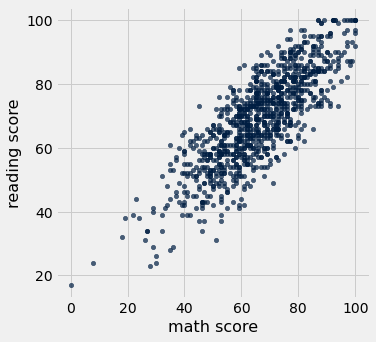

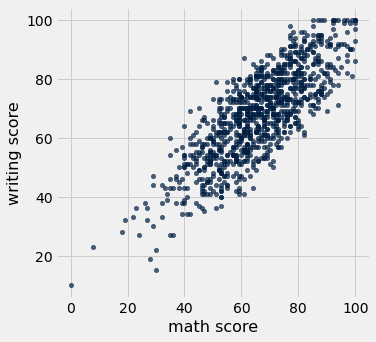

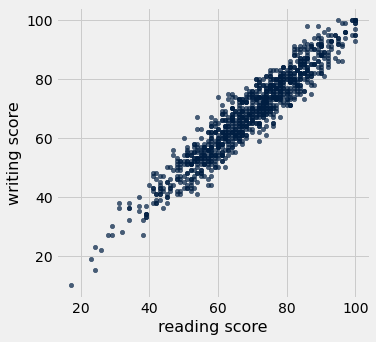

In [16]:
math_scatter_reading = grades.scatter('math score', 'reading score')
math_scatter_writing = grades.scatter('math score', 'writing score')
reading_scatter_writing = grades.scatter('reading score', 'writing score')
#math-reading relationship is similar to  math-writing in plot. However, reading-writing relationship 
#has strict relationship than other types. 

# 6. Gender Analysis

In [17]:
grades = grades.with_column('gender',background.column('gender'))
grades

ID,math score,reading score,writing score,average score,gender
962,100,100,100,100,female
916,100,100,100,100,female
458,100,100,100,100,female
114,99,100,100,99.6,male
712,98,100,99,98.9,male
179,97,100,100,98.8,female
625,100,97,99,98.8,female
165,96,100,100,98.4,male
149,100,100,93,97.9,male
685,94,99,100,97.3,female


In [18]:
#male stats
male_stats = grades.where('gender','male')
male_math = sum(male_stats.column('math score'))/male_stats.num_rows
male_reading = sum(male_stats.column('reading score'))/male_stats.num_rows
male_writing = sum(male_stats.column('writing score'))/male_stats.num_rows
male_average = sum(male_stats.column('average score'))/male_stats.num_rows

#female stats
female_stats = grades.where('gender','female')
female_math = sum(female_stats.column('math score'))/female_stats.num_rows
female_reading = sum(female_stats.column('reading score'))/female_stats.num_rows
female_writing = sum(female_stats.column('writing score'))/female_stats.num_rows
female_average = sum(female_stats.column('average score'))/female_stats.num_rows

stats_table = Table().with_column('score types',['math average','reading average','writing average','general average']).with_column('male',[male_math,male_reading,male_writing,male_average]).with_column('female',[female_math,female_reading,female_writing,female_average])
stats_table

# in general performance, male are successful than female. Also, in each score type male are successful.

score types,male,female
math average,67.0539,65.1911
reading average,69.5643,68.8012
writing average,68.556,67.5869
general average,68.2577,66.9929


# 7. Letter Grade

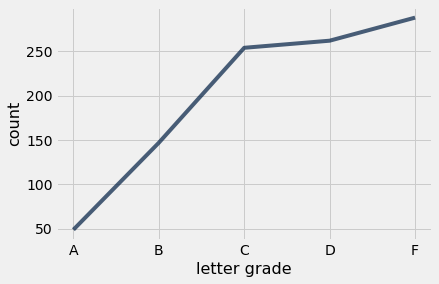

In [19]:
def grading(score):
    if score >= 90:
        return ('A')
    elif 80<= score < 90:
        return ('B')
    elif 70<= score < 80:
        return ('C')
    elif 60<= score < 70:
        return ('D')
    else:
        return ('F')
    
grades = grades.sort('ID')
letter = grades.apply(grading,'average score')
grades_with_letter = grades.with_column('letter grade',letter)
grades_with_letter.group('letter grade').plot('letter grade')

# 8. Race/Ethnic Group Analysis

In [33]:
races = background.column('race/ethnicity')

add_race_to_grade = grades_with_letter.with_column('race/ethnicity',races)

grades_and_race = add_race_to_grade.select('letter grade','race/ethnicity')
race_and_failure = grades_and_race.where('letter grade', are.equal_to('F'))
race_and_failure.group('race/ethnicity').sort('count',descending=True).row(0)

race/ethnicity,count
group A,40
group B,60
group C,98
group D,66
group E,24


# 9. Failed Math, More than 70 Reading

In [21]:
fail_in_math = grades.where('math score', are.below(60)).where('writing score', are.above_or_equal_to(70))
fail_in_math

ID,math score,reading score,writing score,average score,gender
48,57,74,76,67.8,female
70,58,63,73,64,male
105,58,67,72,64.9,female
108,52,76,70,64.6,female
167,58,76,78,69.4,female
220,56,68,74,65,male
224,52,66,73,62.5,female
277,59,63,75,65,male
314,59,64,75,65.3,female
354,59,71,70,65.9,male


# 10. Course Preparation Distributions

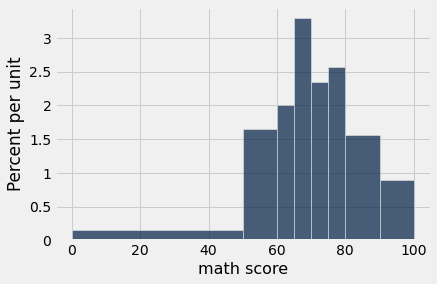

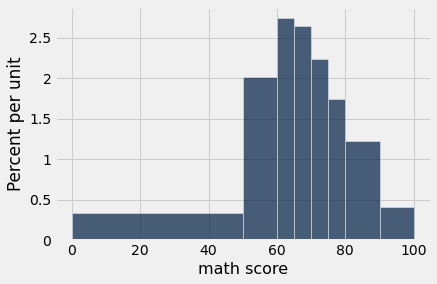

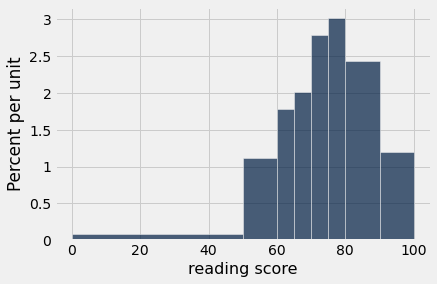

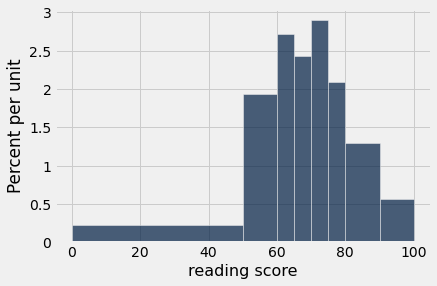

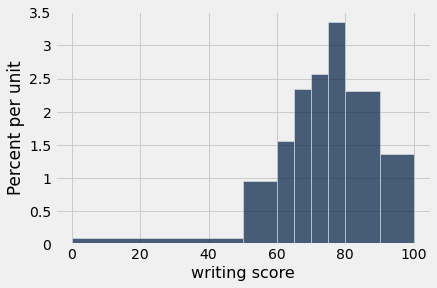

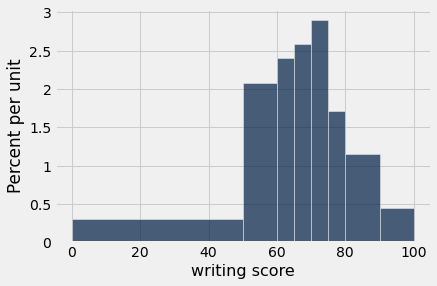

In [26]:
prep = background.column('test preparation course')
add_prep_to_grades = grades_with_letter.with_column('test preparation course',prep)

bingrades_size = make_array(0,50,60,65,70,75,80,90,100)
# add_prep_to_grades
add_prep_to_grades.where('test preparation course', are.equal_to('completed')).hist('math score', bins = bingrades_size)
add_prep_to_grades.where('test preparation course', are.equal_to('none')).hist('math score', bins = bingrades_size)

add_prep_to_grades.where('test preparation course', are.equal_to('completed')).hist('reading score', bins = bingrades_size)
add_prep_to_grades.where('test preparation course', are.equal_to('none')).hist('reading score', bins = bingrades_size)

add_prep_to_grades.where('test preparation course', are.equal_to('completed')).hist('writing score', bins = bingrades_size)
add_prep_to_grades.where('test preparation course', are.equal_to('none')).hist('writing score', bins = bingrades_size)

# 11. Education Level

In [59]:
parental_edu = background.column('parental level of education')
add_parental_background = grades_with_letter.with_column('parental level of education',parental_edu)
add_parental_background = add_parental_background.select('letter grade','parental level of education')

get_count = add_parental_background.group(['letter grade','parental level of education'])
# sum(get_count.column('count'))
percentage = get_count.column('count')/10

get_count = get_count.with_column('percentage', percentage)
get_count

letter grade,parental level of education,count,percentage
A,associate's degree,15,1.5
A,bachelor's degree,12,1.2
A,high school,2,0.2
A,master's degree,6,0.6
A,some college,11,1.1
A,some high school,3,0.3
B,associate's degree,37,3.7
B,bachelor's degree,20,2
B,high school,17,1.7
B,master's degree,14,1.4


# 12. Gender/Ethnic Grid

In [65]:
gender_ethnic = add_race_to_grade.select('letter grade', 'race/ethnicity','gender') 
select_A = gender_ethnic.where('letter grade', are.equal_to('A'))
select_A.group(['race/ethnicity','gender'])

race/ethnicity,gender,count
group A,female,2
group A,male,2
group B,female,5
group B,male,2
group C,female,4
group C,male,8
group D,female,9
group D,male,3
group E,female,7
group E,male,7
